<a href="https://colab.research.google.com/github/rahuldey5156/Machine-Learning-using-Python/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Let's download the iris dataset from its weblink as follows:

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Read the dataset using the Pandas data frame

In [4]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

Observe the data

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Preprocess the data

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Divide the data into train and test splits, with 70% of the training data and 30% of the testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train the model with the help of the RandomForestClassifier class of sklearn

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Now, we have to make the prediction, which can be done in the following way:

In [10]:
y_pred = classifier.predict(X_test)

Print the results as follows:

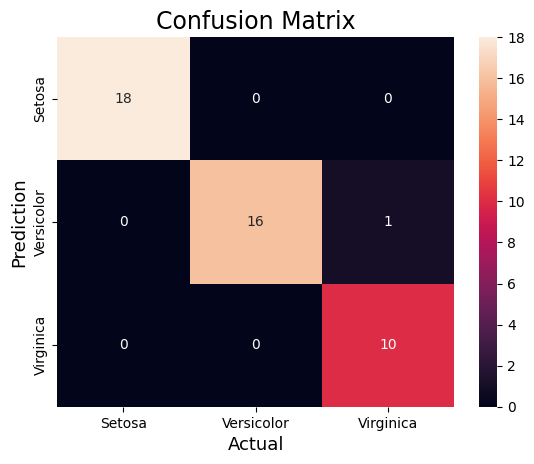

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Using the Random Forest classifier, we have achieved an accuracy of 97.77%